# Construcción del índice sintético de comercio de proximidad

El objectivo es agrupar variables sobre la tipología de establecimientos comerciales y sobre el sector de actividad comercial presentes en cada barrio de la ciudad de Barcelona. A partir de esta información se generarán las siguientes variables para construir el índice:
- Presencia o ausencia (0/1) de establecimientos comerciales especiales, de cuatro tipos: a) mercados municipales, ferias o mercados de calle, galerías comerciales pequeñas, que contribuyen positivamente al índice; b) grandes centros comerciales, que contribuyen negativamente.
- Proporción de comercios en sectores de uso mu y frecuente, que denominaremos "establecimientos cotidianos". Una vez conocida la media por barrios, se binarizará según si los barrios quedan por encima o por debajo de la media aproximada. Una alta proporción de estos establecimientos contribuye positivamente al índice, y viceversa.
- Diversidad en los sectores comerciales presentes en el barrio. Nuevamente se binarizará con corte en un valor próximo a la media. Una alta diversidad contribuye positivamente al índice, y viceversa.

Es necesario descargar los siguientes datasets en formato CSV del portal Open Data BCN para ejecutar este notebook. Los archivos deben ubicarse en el mismo directorio que el notebook:
- [Censo de actividades económicas en planta baja de la ciudad de Barcelona](https://opendata-ajuntament.barcelona.cat/data/ca/dataset/cens-activitats-comercials)
- [Mercados y ferias en la calle de la ciudad de Barcelona](https://opendata-ajuntament.barcelona.cat/data/ca/dataset/mercats-fires-carrer)
- [Mercados municipales de la ciudad de Barcelona](https://opendata-ajuntament.barcelona.cat/data/ca/dataset/mercats-municipals)
- [Grandes centros comerciales de la ciudad de Barcelona](https://opendata-ajuntament.barcelona.cat/data/ca/dataset/grans-centres-comercials)
- [Galerías comerciales de la ciudad de Barcelona](https://opendata-ajuntament.barcelona.cat/data/ca/dataset/galeries-comercials)


In [1]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## 1. Generación de variables según la presencia de establecimientos singulares

In [2]:
# cargar datasets establecimentos comerciales singulares
fires_carrer =pd.read_csv("opendatabcn_mercats-centrescomercials_mercats-fires-al-carrer.csv"
                            , sep=',', encoding = 'utf-16')

mercats_municipals= pd.read_csv ("opendatabcn_mercats-centrescomercials_mercats-municipals.csv"
                            , sep=',', encoding = 'utf-16')

centres_comercials = pd.read_csv("opendatabcn_mercats-centrescomercials_grans-centres-comercials.csv"
                            , sep=',', encoding = 'utf-16')

galeries = pd.read_csv("opendatabcn_mercats-centrescomercials_galeries-comercials.csv"
                            , sep=',', encoding = 'utf-16')

In [3]:
# recuento de establecimientos singulares por barrio
barris_fc=fires_carrer['addresses_neighborhood_id'].value_counts()
barris_fc = barris_fc.rename_axis('barri').reset_index(name='num_FC')

barris_mm=mercats_municipals['addresses_neighborhood_id'].value_counts()
barris_mm = barris_mm.rename_axis('barri').reset_index(name='num_MM')

barris_cc = centres_comercials['addresses_neighborhood_id'].value_counts()
barris_cc = barris_cc.rename_axis('barri').reset_index(name='num_CC')

barris_gc = galeries['addresses_neighborhood_id'].value_counts()
barris_gc = barris_gc.rename_axis('barri').reset_index(name='num_GC')

In [4]:
# unión de datasets
barris_fc_mm = pd.merge(barris_fc, barris_mm, on='barri', how='outer')
barris_cc_gc = pd.merge(barris_cc, barris_gc, on='barri', how='outer')

comerbarris = pd.merge(barris_fc_mm, barris_cc_gc, on='barri', how='outer')
comerbarris.head(5)

,barri,num_FC,num_MM,num_CC,num_GC
0,2,7.0,2.0,3.0,1.0
1,19,4.0,2.0,4.0,NaN
2,23,4.0,2.0,NaN,NaN
3,10,4.0,5.0,NaN,NaN
4,4,3.0,1.0,NaN,NaN


## 2. Generación de variables a partir del censo de actividades comerciales: establecimientos comerciales, diversidad

In [5]:
# cargar dataset del censo de actividad comercial
censcomers = pd.read_csv("2019_censcomercialbcn_detall.csv", sep = ",")
censcomers.head(5)

,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio
0,1075454,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
1,1075453,NaN,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
2,1075451,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
3,1075449,NaN,1,Actiu,3,Altres,17,Altres,1700100,Administració,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
4,1075448,NaN,1,Actiu,2,Serveis,16,Altres,1600101,Activitats de transport,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0


In [6]:
# Comprobación de los tipos de actividades únicas registradas
censcomers.Nom_Activitat.nunique()

83

In [7]:
# Listado de actividades comerciales únicas
censcomers.Nom_Activitat.unique()

array(['Serveis a les empreses i oficines', 'Activitats emmagatzematge',
       'Administració', 'Activitats de transport ', 'Vehicles',
       'Restaurants', 'Material equipament llar', 'Carn i Porc', 'Altres',
       'Peix i marisc', 'Floristeries', 'Fruites i verdures',
       'Drogueria i perfumeria', 'Vestir', 'Ous i aus',
       'Pa, pastisseria i làctics', 'Basars',
       'Plats preparats (no degustació)', 'Farmàcies PARAFARMÀCIA',
       'Ensenyament', 'Sense informació', 'Souvenirs',
       'Reparacions (Electrodomèstics i automòbils)',
       'Autoservei / Supermercat', 'Sanitat i assistència',
       'Sense informació - Havia tingut activitat (rètol)',
       'Finances i assegurances', "serveis d'allotjament",
       'Bars   / CIBERCAFÈ', 'Equipaments culturals i recreatius',
       'En reforma', 'Merceria', 'Locals buits en venda i lloguer',
       'Arts gràfiques', "Centres d'estètica", 'Calçat i pell',
       'Xocolateries / Geladeries / Degustació', 'Activitats industri

In [8]:
# Recuento por tipo de actividad comercial en la ciudad de Barcelona
censcomers.groupby('Nom_Activitat').count()

,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Codi_Activitat_2016,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio
Nom_Activitat,,,,,,,,,,,,,,,,,,,,,
Activitats de la construcció,1965,1799,1965,1965,1965,1965,1965,1965,1965,1965,...,1965,1965,1965,1965,1965,1965,1965,1965,1965,1963
Activitats de transport,448,402,448,448,448,448,448,448,448,448,...,446,446,446,448,448,448,448,448,446,447
Activitats de transport i emmagatzematge,141,140,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
Activitats emmagatzematge,1442,1150,1442,1442,1442,1442,1442,1442,1442,1442,...,1438,1438,1438,1442,1442,1442,1442,1442,1438,1442
Activitats immobiliàries,950,883,950,950,950,950,950,950,950,950,...,950,950,950,950,950,950,950,950,950,949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
altres,16,12,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
serveis d'allotjament,740,654,740,740,740,740,740,740,740,740,...,740,740,740,740,740,740,740,740,740,739
serveis de menjar i begudes,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,87


In [9]:
# Definición de las actividades de tipo cotidiano
actQuo = ['Restaurants', 'Carn i Porc',
       'Peix i marisc', 'Floristeries', 'Fruites i verdures',
       'Drogueria i perfumeria', 'Ous i aus',
       'Pa, pastisseria i làctics', 'Basars',
       'Plats preparats (no degustació)', 'Farmàcies PARAFARMÀCIA',
       'Ensenyament', 'Autoservei / Supermercat', 'Sanitat i assistència',
       'Bars   / CIBERCAFÈ', 'Equipaments culturals i recreatius',
       'Xocolateries / Geladeries / Degustació', 'Perruqueries',
       'Tabac i articles fumadors',
       'Serveis de menjar take away MENJAR RÀPID', 'Serveis Socials',
       'Associacions', 'Gimnàs /fitnes',
       'Llibres, diaris i revistes', 'Manteniment, neteja i similars', 'Veterinaris / Mascotes',
       'Herbolaris, dietètica i NUTRICIÓ',
       'Bars especials amb actuació / Bars musicals / Discoteques /PUB', 'Begudes', 'Tintoreries', 'serveis de menjar i begudes',
       'Equipaments religiosos',
       'Locutoris']

In [10]:
# Aplicación de la clasificacion anterior al dataset
censcomers["quotidia"] = censcomers["Nom_Activitat"].apply(lambda f: f in actQuo)
censcomers_red = censcomers[["Codi_Activitat_2019", "Nom_Activitat", "Codi_Barri", "quotidia"]]

In [11]:
#Recuento total de establecimientos por barrio
activitat = censcomers_red.groupby("Codi_Barri").count()

In [12]:
#Recuento total de establecimientos COTIDIANOS por barrio
quotidia = censcomers_red[censcomers_red["quotidia"] == True].groupby(["Codi_Barri", "quotidia"]).count()
quotidia.rename(columns={'Nom_Activitat': 'True_quotidia'}, inplace=True)
quotidia.head(5)

,,Codi_Activitat_2019,True_quotidia
Codi_Barri,quotidia,,
1,True,1382,1382
2,True,863,863
3,True,409,409
4,True,897,897
5,True,544,544


In [13]:
# Resetear indices de los 2 recuentos
activitat.reset_index(inplace=True)  
quotidia.reset_index(inplace=True)

# Cálculo de la proporción de establecimientos cotidianos por barrio
activitat['True_quotidia'] = quotidia['True_quotidia']
activitat['Prop_quotidia'] = activitat.apply(lambda f: f.True_quotidia / f.quotidia, axis = 1)
activitat.head(5)

,Codi_Barri,Codi_Activitat_2019,Nom_Activitat,quotidia,True_quotidia,Prop_quotidia
0,1,2968,2968,2968,1382,0.465633
1,2,2269,2269,2269,863,0.380344
2,3,747,747,747,409,0.547523
3,4,2182,2182,2182,897,0.411091
4,5,1401,1401,1401,544,0.388294


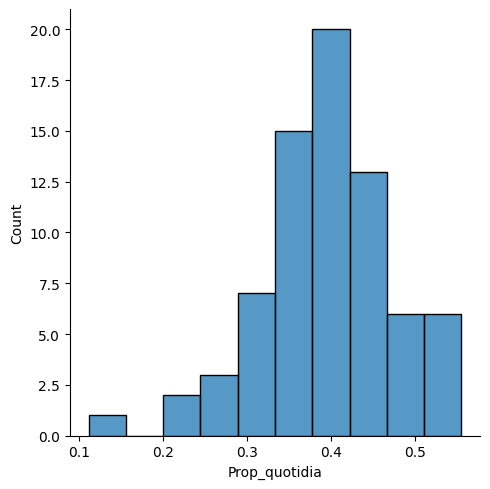

In [14]:
sns.displot(kind="hist", data=activitat, x="Prop_quotidia", bins=10);

En promedio, cerca del 40% de las actividades comerciales censadas se corresponden con la etiqueta "cotidianas" que se ha definido aquí. Sin embargo, hay unos pocos barrios con muy poca presencia relativa de estos establecimientos esenciales.

In [15]:
# Binarización de la proporción de establecimientos cotidianos con corte cercano a la media
def binarizador(quotidia):
    if quotidia["Prop_quotidia"] >= 0.4:
        return 1
    else: 
        return 0

activitat['Bin_quotidia'] = activitat.apply(binarizador, axis=1)
activitat.head(5)

,Codi_Barri,Codi_Activitat_2019,Nom_Activitat,quotidia,True_quotidia,Prop_quotidia,Bin_quotidia
0,1,2968,2968,2968,1382,0.465633,1
1,2,2269,2269,2269,863,0.380344,0
2,3,747,747,747,409,0.547523,1
3,4,2182,2182,2182,897,0.411091,1
4,5,1401,1401,1401,544,0.388294,0


In [16]:
# Con esto ya tenemos construida la variable binarizada de establecimientos cotidianos
activitat['Bin_quotidia'].value_counts()

0    37
1    36
Name: Bin_quotidia, dtype: int64

In [17]:
# Construcción de la variable de diversidad comercial por barrio
n_actividades = censcomers_red.groupby("Codi_Barri")["Nom_Activitat"].nunique()
activitat['n_actividades'] = activitat['Codi_Barri'].map(n_actividades)
activitat['Prop_actividades'] = activitat['n_actividades'].apply(lambda f: f/83)
activitat.head(5)

,Codi_Barri,Codi_Activitat_2019,Nom_Activitat,quotidia,True_quotidia,Prop_quotidia,Bin_quotidia,n_actividades,Prop_actividades
0,1,2968,2968,2968,1382,0.465633,1,73,0.879518
1,2,2269,2269,2269,863,0.380344,0,72,0.867470
2,3,747,747,747,409,0.547523,1,64,0.771084
3,4,2182,2182,2182,897,0.411091,1,74,0.891566
4,5,1401,1401,1401,544,0.388294,0,75,0.903614


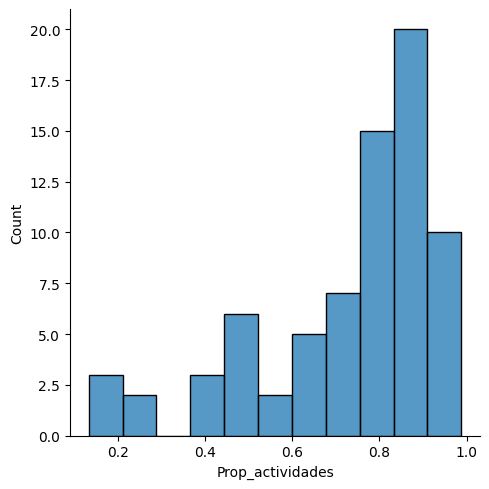

In [18]:
sns.displot(kind="hist", data=activitat, x="Prop_actividades", bins=11);

La mayoría de barrios obtienen un buen valor de diversidad de actividad comercial, estando el promedio cerca del 80% de presencia de todos los sectores comerciales posibles. Sin embargo hay un número significativo de barrios con valores de diversidad bajos o extremadamente bajos.

In [19]:
# Binarización de la diversidad de establecimientos comerciales con corte cercano a la media
def binarizador(acti):
    if acti["Prop_actividades"] >= 0.8:
        return 1
    else: 
        return 0

activitat['Bin_actividades'] = activitat.apply(binarizador, axis=1)
activitat.head(5)

,Codi_Barri,Codi_Activitat_2019,Nom_Activitat,quotidia,True_quotidia,Prop_quotidia,Bin_quotidia,n_actividades,Prop_actividades,Bin_actividades
0,1,2968,2968,2968,1382,0.465633,1,73,0.879518,1
1,2,2269,2269,2269,863,0.380344,0,72,0.867470,1
2,3,747,747,747,409,0.547523,1,64,0.771084,0
3,4,2182,2182,2182,897,0.411091,1,74,0.891566,1
4,5,1401,1401,1401,544,0.388294,0,75,0.903614,1


In [20]:
# Eliminación de las columnas no útiles 
activitat = activitat[['Codi_Barri','Bin_quotidia','Bin_actividades']]
activitat.head(5)

,Codi_Barri,Bin_quotidia,Bin_actividades
0,1,1,1
1,2,0,1
2,3,1,0
3,4,1,1
4,5,0,1


## 3. Unión de datasets y binarización de las variables pendientes

In [21]:
# Unión de los dos datasets
activitat.rename(columns={'Codi_Barri' : 'barri'}, inplace=True)
comersLocal = pd.merge(activitat, comerbarris, on='barri', how='outer')
comersLocal.head(5)

,barri,Bin_quotidia,Bin_actividades,num_FC,num_MM,num_CC,num_GC
0,1,1,1,2.0,1.0,NaN,NaN
1,2,0,1,7.0,2.0,3.0,1.0
2,3,1,0,1.0,1.0,NaN,NaN
3,4,1,1,3.0,1.0,NaN,NaN
4,5,0,1,2.0,3.0,NaN,NaN


In [22]:
# Preparación para binarizar de las columnas pendientes
comersLocal['num_FC'].fillna(0,inplace=True)
comersLocal['num_MM'].fillna(0,inplace=True)
comersLocal['num_GC'].fillna(0,inplace=True)
comersLocal.head(5)

,barri,Bin_quotidia,Bin_actividades,num_FC,num_MM,num_CC,num_GC
0,1,1,1,2.0,1.0,NaN,0.0
1,2,0,1,7.0,2.0,3.0,1.0
2,3,1,0,1.0,1.0,NaN,0.0
3,4,1,1,3.0,1.0,NaN,0.0
4,5,0,1,2.0,3.0,NaN,0.0


[Text(0, 0.5, '')]

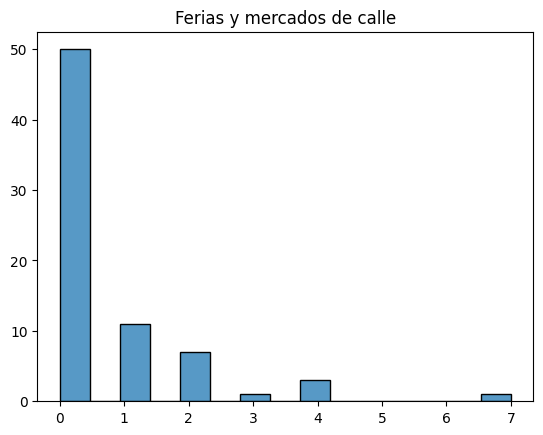

In [23]:
#figure, axes = plt.subplots(3, 1, figsize=(10,18))
p0 = sns.histplot(data=comersLocal, x="num_FC");
p0.set_title("Ferias y mercados de calle")
p0.set(xlabel=None)
p0.set(ylabel=None)


Las ferias y mercados de calle tienen aún poca presencia en la ciudad. Solo un tercio de los barrios disponen, y las existentes se concentran en unos pocos barrios que disponen de múltiples.

[Text(0, 0.5, '')]

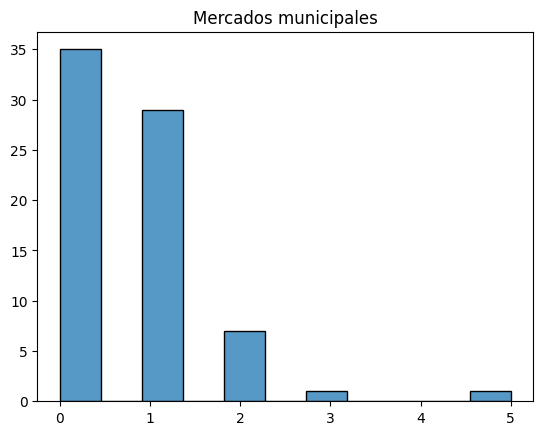

In [24]:
p1 = sns.histplot(data=comersLocal, x="num_MM");
p1.set_title("Mercados municipales")
p1.set(xlabel=None)
p1.set(ylabel=None)


Aproximadamente la mitad de los barrios no disponen de un mercado municipal ubicado dentro de su límite administrativo. En muy pocas ocasiones existe más de un mercado por barrio.

[Text(0, 0.5, '')]

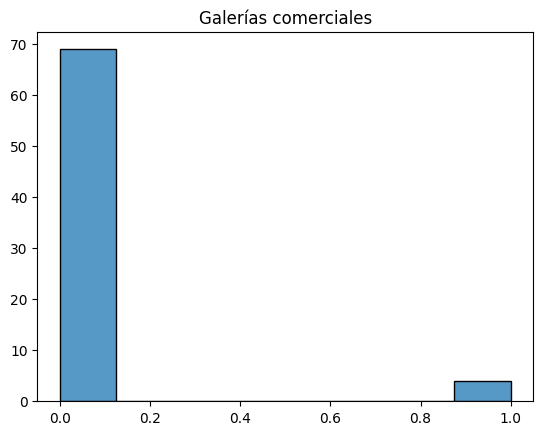

In [25]:
p2 = sns.histplot(data=comersLocal, x="num_GC");
p2.set_title("Galerías comerciales")
p2.set(xlabel=None)
p2.set(ylabel=None)

Las galerías comerciales son inexistentes en la gran mayoría de los barrios.

In [26]:
# Binarización de columnas, excepto Centros Comerciales, que se puntuan a la inversa
def unificador(x):
    if x> 0:
        return 1  
    else:
        return 0
    
comersLocal['fires']=comersLocal['num_FC'].apply(unificador)
comersLocal['mercats']=comersLocal['num_MM'].apply(unificador)
comersLocal['galeries']=comersLocal['num_GC'].apply(unificador)

In [27]:
# Binarizaciónde la columna centro comercial
def zerificador(x):
    if x> 0:
        return 0 
    else:
        return 1
    
comersLocal['centres']=comersLocal['num_CC'].apply(zerificador)
comersLocal.head(5)

,barri,Bin_quotidia,Bin_actividades,num_FC,num_MM,num_CC,num_GC,fires,mercats,galeries,centres
0,1,1,1,2.0,1.0,NaN,0.0,1,1,0,1
1,2,0,1,7.0,2.0,3.0,1.0,1,1,1,0
2,3,1,0,1.0,1.0,NaN,0.0,1,1,0,1
3,4,1,1,3.0,1.0,NaN,0.0,1,1,0,1
4,5,0,1,2.0,3.0,NaN,0.0,1,1,0,1


[Text(0, 0.5, '')]

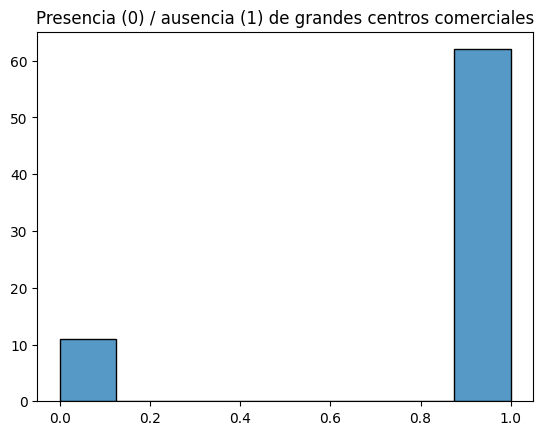

In [28]:
p3 = sns.histplot(data=comersLocal, x="centres");
p3.set_title("Presencia (0) / ausencia (1) de grandes centros comerciales")
p3.set(xlabel=None)
p3.set(ylabel=None)

Podemos comprobar cómo la mayoría de barrios no disponen de un gran centro comercial.

In [29]:
# Eliminación de columnas no útiles
comersLocal.drop(columns=['num_FC','num_MM','num_CC','num_GC'], inplace=True)
comersLocal.rename(columns={'Bin_quotidia':'quotidia','Bin_actividades':'variacio'}, inplace=True)
comersLocal.head(5)

,barri,quotidia,variacio,fires,mercats,galeries,centres
0,1,1,1,1,1,0,1
1,2,0,1,1,1,1,0
2,3,1,0,1,1,0,1
3,4,1,1,1,1,0,1
4,5,0,1,1,1,0,1


## 4. Construcción del índice de comercio de proximidad
Construimos el índice otorgando, por una parte, un peso combinado del 40% a la presencia o ausencia de establecimientos singulares, a razón del 10% por tipo de establecimiento considerado; los grandes centros comerciales contribuyen negativamente, por eso su presencia se asocia a un valor 0. La variable "diversidad" recibe un peso del 20%, mientras la variable "proporción de establecimientos cotidianos" recibe el 40% restante. De esta forma, el rango de la nota queda acotada entre 0 y 10 puntos.

In [30]:
# Cálculo para la columna índice síntetico de comercio de proximidad con rango 0-10 (score)
comersLocal['score'] = comersLocal.apply(lambda f: f.fires + f.mercats + f.centres +
                    f.galeries + (f.variacio*2) + (f.quotidia*4), axis=1)
comersLocal.head(5)

,barri,quotidia,variacio,fires,mercats,galeries,centres,score
0,1,1,1,1,1,0,1,9
1,2,0,1,1,1,1,0,5
2,3,1,0,1,1,0,1,7
3,4,1,1,1,1,0,1,9
4,5,0,1,1,1,0,1,5


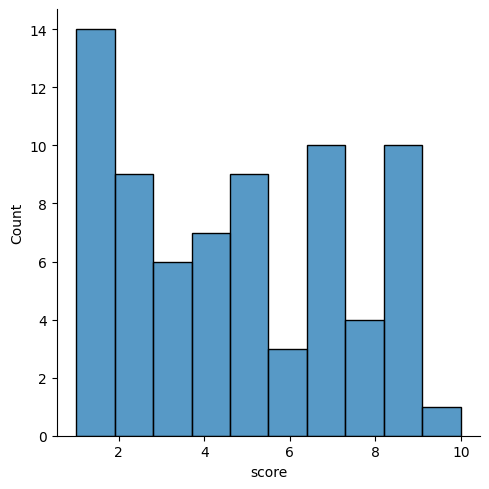

In [31]:
sns.displot(kind="hist", data=comersLocal, x="score", bins=10);

Las notas asignadas a los barrios presentan una distribución bastante uniforme, con plena ocupación de todo el rango que permite la variable. En conclusión, el índice muestra su utilidad para clasificar relativamente el grado de proximidad del tejido comercial de los barrios, según se definió la proximidad en el presente ejercicio.

Cuanto a las notas alcanzadas, destaca la existencia de un número muy considerable de barrios con valores muy bajos, dando a entender que existe todavía mucho margen de mejora en este indicador y por tanto la necesidad de que se apliquen políticas públicas dirigidas hacia su corrección.

## 5. Finalización y exportación del dataset

In [32]:
# Añadimos la columna con el nombre de los barrios que es necesario para el frontend
llista_codi = censcomers['Codi_Barri'].unique()
llista_nom = censcomers['Nom_Barri'].unique()
llistes = [llista_codi, llista_nom]
barris = pd.DataFrame(llistes)
barris = barris.T
barris = barris.sort_values(0).reset_index()

comersLocal['nomBarri'] = barris[1]
comersLocal.head(5)

,barri,quotidia,variacio,fires,mercats,galeries,centres,score,nomBarri
0,1,1,1,1,1,0,1,9,el Raval
1,2,0,1,1,1,1,0,5,el Barri Gòtic
2,3,1,0,1,1,0,1,7,la Barceloneta
3,4,1,1,1,1,0,1,9,"Sant Pere, Santa Caterina i la Ribera"
4,5,0,1,1,1,0,1,5,el Fort Pienc


In [33]:
# Exportamos los archivos para su uso en backend y frontend
comersLocal.to_csv('comersLocal.csv')
comersLocal.to_json('comersLocal.json')